## 뇌종양 예측 AI

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
bt_data = pd.read_csv('dataset/brain_tumor_dataset.csv')
#print(bt_data.isnull().sum()) # 결측치 확인
bt_data_column_list = list(bt_data.columns)
#print(len(bt_data_column_list))
XColumns1 = list(bt_data.columns[1:3])
#print(XColumns1)
XColumns2 = list(bt_data.columns[4:14])
#print(XColumns2)
XColumns3 = list(bt_data.columns[15:-1])
#print(XColumns3)
XColumns = XColumns1 + XColumns2 + XColumns3
#print(XColumns)

X = bt_data.drop('Tumor_Type', axis=1).drop('Survival_Rate', axis=1).drop('Follow_Up_Required', axis=1).values  # Survival_Rate(생존율) 열을 제외한 모든 특성
X = X[:,1:] # 첫 컬럼은 데이터 아이디라서 제외
#print(X)
#y_TT = bt_data['Tumor_Type'].values  # 타겟 변수 : 종양이 악성인지 양성인지 : 분류모델을 사용해야
y_SR = bt_data['Survival_Rate'].values  # 타겟 변수 : 생존율이 얼마나 되는지 : 회귀모델을 사용해야
#y_FR = bt_data['Follow_Up_Required'].values  # 타겟 변수 : 후속조치가 필요한지 : 분류모델을 사용해야
#print(y_SR)

gender_List = list(bt_data['Gender'].unique()) # 성별 X[1]
gender_List.sort()
print(gender_List)
# ['Female', 'Male']
"""
# 분류 모델에서 사용
tumor_Type_List = list(bt_data['Tumor_Type'].unique()) # 뇌종양 유형(양성/악성) y_TT
tumor_Type_List.sort()
print(tumor_Type_List)
# ['Benign', 'Malignant']
# ['양성', '악성']
"""
location_List = list(bt_data['Location'].unique()) # 종양 위치 X[3]
location_List.sort()
print(location_List)
# ['Frontal', 'Occipital', 'Parietal', 'Temporal']
# '전두엽', '후두엽', '두정엽', '측두엽'
histology_List = list(bt_data['Histology'].unique()) # 조직학적 유형 X[4]
histology_List.sort()
print(histology_List)
# ['Astrocytoma', 'Glioblastoma', 'Medulloblastoma', 'Meningioma']
# ['성상세포종', '교모세포종', '수질모세포종', '수막종']
stage_List = list(bt_data['Stage'].unique()) # 병기 X[5]
stage_List.sort()
print(stage_List)
# ['I', 'II', 'III', 'IV']
symptom_1_List = list(bt_data['Symptom_1'].unique()) # 첫번째증상 X[6]
symptom_1_List.sort()
print(symptom_1_List)
# ['Headache', 'Nausea', 'Seizures', 'Vision Issues']
# ['두통', '메스꺼움', '발작', '시력 문제']
# 2, 3 도 같음
symptom_2_List = list(bt_data['Symptom_2'].unique()) # 두번째증상 X[7]
symptom_2_List.sort()
print(symptom_2_List)
symptom_3_List = list(bt_data['Symptom_3'].unique()) # 세번째증상 X[8]
symptom_3_List.sort()
print(symptom_3_List)
radiation_Treatment_List = list(bt_data['Radiation_Treatment'].unique()) # 방사선 치료 여부 X[9]
radiation_Treatment_List.sort()
print(radiation_Treatment_List)
# ['No', 'Yes']
surgery_Performed_List = list(bt_data['Surgery_Performed'].unique()) # 수술 여부 X[10]
surgery_Performed_List.sort()
print(surgery_Performed_List)
# ['No', 'Yes']
chemotherapy_List = list(bt_data['Chemotherapy'].unique()) # 화학요법 치료 여부 X[11]
chemotherapy_List.sort()
print(chemotherapy_List)
# ['No', 'Yes']
family_History_List = list(bt_data['Family_History'].unique()) # 가족력(가족도 뇌종양을 알았는지) 여부 X[13]
family_History_List.sort()
print(family_History_List)
# ['No', 'Yes']
mri_Result_List = list(bt_data['MRI_Result'].unique()) # MRI 스캔 결과 여부 X[14]
mri_Result_List.sort()
print(mri_Result_List)
# ['Negative', 'Positive']
"""
# 분류 모델에서 사용
follow_Up_Required_List = list(bt_data['Follow_Up_Required'].unique()) # 후속조치가 필요한지 여부 y_FR
follow_Up_Required_List.sort()
print(follow_Up_Required_List)
# ['No', 'Yes']
"""

# 문자데이터 숫자로 변환
for x in X:
    for idx,g in enumerate(gender_List):
        if x[1] == g:
            x[1] = idx+1
            
    for idx,l in enumerate(location_List):
        if x[3] == l:
            x[3] = idx+1
            
    for idx,h in enumerate(histology_List):
        if x[4] == h:
            x[4] = idx+1
            
    for idx,s in enumerate(stage_List):
        if x[5] == s:
            x[5] = idx+1
            
    for idx,s1 in enumerate(symptom_1_List):
        if x[6] == s1:
            x[6] = idx+1
            
    for idx,s2 in enumerate(symptom_2_List):
        if x[7] == s2:
            x[7] = idx+1
            
    for idx,s3 in enumerate(symptom_3_List):
        if x[8] == s3:
            x[8] = idx+1
            
    for idx,rt in enumerate(radiation_Treatment_List):
        if x[9] == rt:
            x[9] = idx+1
            
    for idx,sp in enumerate(surgery_Performed_List):
        if x[10] == sp:
            x[10] = idx+1
            
    for idx,c in enumerate(chemotherapy_List):
        if x[11] == c:
            x[11] = idx+1
            
    for idx,fh in enumerate(family_History_List):
        if x[13] == fh:
            x[13] = idx+1
            
    for idx,mr in enumerate(mri_Result_List):
        if x[14] == mr:
            x[14] = idx+1

"""
# 분류 모델 학습시 사용
for y in y_TT:
    for idx,tt in enumerate(tumor_Type_List):
        if y == tt:
            y = idx+1

for y in y_FR:
    for idx,fr in enumerate(follow_Up_Required_List):
        if y == fr:
            y = idx+1
    
"""    
###### 초기 학습 (데이터 전처리 전)

# 스케일링 처리
# 데이터 프레임으로 변환
Xdf = pd.DataFrame(X, columns=XColumns)     
print(Xdf)

# 데이터 전처리: 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xdf)
X_scaled = pd.DataFrame(X_scaled, columns=Xdf.columns)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_SR, test_size=0.2, random_state=42)

lr_model = LinearRegression()
sgdr_model = SGDRegressor(max_iter=200, eta0=1e-4, random_state=42, verbose=1)
# max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력

# 선형회귀 학습
lr_model.fit(X_train,y_train)
lr_y_pred = lr_model.predict(X_test)

# 선형회귀 평가
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
print(f'lr_mse : {lr_mse:.2f}')
# lr_mse : 295.05 : 수가 너무 큼 (작을 수록 좋다)
print(f'lr_r2 : {lr_r2:.2f}')
# lr_r2 : -0.00 : 수가 너무 작다 : 1에 가까울 수록 좋고 0에 가까울수록 나쁨

# 경사하강법 학습
sgdr_model.fit(X_train,y_train)
sgdr_y_pred = sgdr_model.predict(X_test)

# 경사하강법 평가
sgdr_mse = mean_squared_error(y_test, sgdr_y_pred)
sgdr_r2 = r2_score(y_test, sgdr_y_pred)
print(f'sgdr_mse : {sgdr_mse:.2f}')
# sgdr_mse : 295.12 : 수가 너무 큼 (0에 가까울수록 좋다)
print(f'sgdr_r2 : {sgdr_r2:.2f}')
# sgdr_r2 : -0.00 : 수가 너무 작다 (1에 가까울 수록 좋고 0에 가까울수록 나쁘다)

####### 데이터를 보고 전처리를 해야한다
####### 스케일링을 하지 말아보고  다시 해보자

"""

# 1. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # n_esimators : 모델을 구성하는 결정 틀의 개수수
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# 랜덤 포레스트 평가
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

# 2. 다른 모델 비교
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

# 3. 최적 모델 선택 및 시각화
results["Random Forest"] = {"MSE": rf_mse, "R2": rf_r2}
best_model = max(results, key=lambda x: results[x]['R2'])
print("\n최적 모델:", best_model)

# 결과 시각화
r2_scores = [result["R2"] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()
"""

['Female', 'Male']
['Frontal', 'Occipital', 'Parietal', 'Temporal']
['Astrocytoma', 'Glioblastoma', 'Medulloblastoma', 'Meningioma']
['I', 'II', 'III', 'IV']
['Headache', 'Nausea', 'Seizures', 'Vision Issues']
['Headache', 'Nausea', 'Seizures', 'Vision Issues']
['Headache', 'Nausea', 'Seizures', 'Vision Issues']
['No', 'Yes']
['No', 'Yes']
['No', 'Yes']
['No', 'Yes']
['Negative', 'Positive']
      Age Gender Tumor_Size Location Histology Stage Symptom_1 Symptom_2  \
0      73      2   5.375612        4         1     3         4         3   
1      26      2   4.847098        3         2     2         1         1   
2      31      2   5.588391        3         4     1         4         1   
3      29      2     1.4366        4         3     4         4         3   
4      54      1   2.417506        3         2     1         1         1   
...    ..    ...        ...      ...       ...   ...       ...       ...   
19995  21      2   9.612013        3         3     3         3         2 

'\n\n# 1. 랜덤 포레스트 모델\nrf_model = RandomForestRegressor(random_state=42, n_estimators=100) # n_esimators : 모델을 구성하는 결정 틀의 개수수\nrf_model.fit(X_train, y_train)\nrf_y_pred = rf_model.predict(X_test)\n\n# 랜덤 포레스트 평가\nrf_mse = mean_squared_error(y_test, rf_y_pred)\nrf_r2 = r2_score(y_test, rf_y_pred)\nprint(f"랜덤 포레스트 - MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")\n\n# 2. 다른 모델 비교\nmodels = {\n    "Linear Regression": LinearRegression(),\n    "Decision Tree": DecisionTreeRegressor(random_state=42)\n}\n\nresults = {}\nfor name, model in models.items():\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n    mse = mean_squared_error(y_test, y_pred)\n    r2 = r2_score(y_test, y_pred)\n    results[name] = {"MSE": mse, "R2": r2}\n    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")\n\n# 3. 최적 모델 선택 및 시각화\nresults["Random Forest"] = {"MSE": rf_mse, "R2": rf_r2}\nbest_model = max(results, key=lambda x: results[x][\'R2\'])\nprint("\n최적 모델:", best_model)\n\n# 결과 시각화\nr2_scores = [result["R2"]

In [3]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_SR, test_size=0.2, random_state=42)

lr_model = LinearRegression()
sgdr_model = SGDRegressor(max_iter=200, eta0=1e-4, random_state=42, verbose=1)
# max_iter : 모델 학습 횟수, eta0 : 학습율(1e-4: 0.0001), versbose=1 학습결과출력

# 선형회귀 학습
lr_model.fit(X_train,y_train)
lr_y_pred = lr_model.predict(X_test)

# 선형회귀 평가
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
print(f'lr_mse : {lr_mse:.2f}')
# lr_mse : 295.05 : 수가 너무 큼 (작을 수록 좋다)
print(f'lr_r2 : {lr_r2:.2f}')
# lr_r2 : -0.00 : 수가 너무 작다 : 1에 가까울 수록 좋고 0에 가까울수록 나쁨

# 경사하강법 학습
sgdr_model.fit(X_train,y_train)
sgdr_y_pred = sgdr_model.predict(X_test)

# 경사하강법 평가
sgdr_mse = mean_squared_error(y_test, sgdr_y_pred)
sgdr_r2 = r2_score(y_test, sgdr_y_pred)
print(f'sgdr_mse : {sgdr_mse:.2f}')
# sgdr_mse : 343.34 : 수가 너무 큼 (스케일링을 안 하니 값이 더욱 커짐)
print(f'sgdr_r2 : {sgdr_r2:.2f}')
# sgdr_r2 : -0.16 : 수가 너무 작다 (음수는 평균보다 못하다는 의미)

lr_mse : 295.05
lr_r2 : -0.00
-- Epoch 1
Norm: 5.59, NNZs: 15, Bias: 0.793308, T: 16000, Avg. loss: 242.521626
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.57, NNZs: 15, Bias: 1.042170, T: 32000, Avg. loss: 194.974503
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 7.05, NNZs: 15, Bias: 1.208603, T: 48000, Avg. loss: 187.744899
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 7.34, NNZs: 15, Bias: 1.339028, T: 64000, Avg. loss: 184.567026
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 7.55, NNZs: 15, Bias: 1.452073, T: 80000, Avg. loss: 182.801895
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 7.72, NNZs: 15, Bias: 1.553178, T: 96000, Avg. loss: 181.628729
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 7.84, NNZs: 15, Bias: 1.644710, T: 112000, Avg. loss: 180.789943
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 7.95, NNZs: 15, Bias: 1.730306, T: 128000, Avg. loss: 180.113000
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 8.05, NNZs: 15, Bias: 1

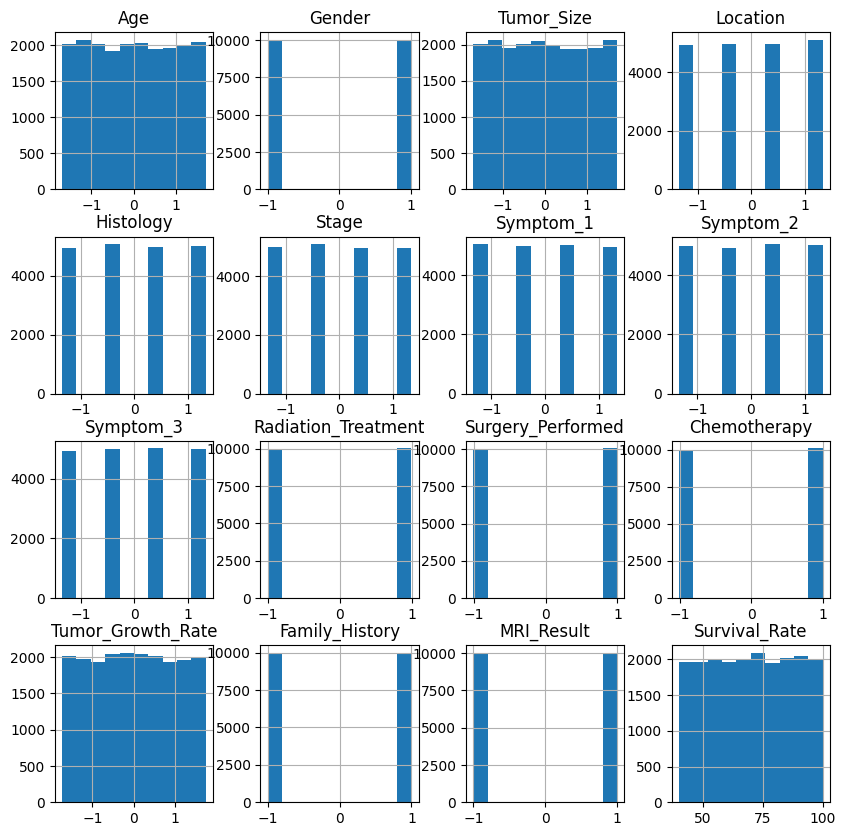

In [6]:
# 각 변수의 분포 확인
#print(X_scaled)
y_SR_df = pd.DataFrame(y_SR, columns=["Survival_Rate"])
#print(y_SR_df)
ck_bt_data = pd.concat([X_scaled, y_SR_df], axis=1)
#print(ck_bt_data.head())
ck_bt_data.hist(figsize=(10, 10)) # figsize=(길이, 높이) : 사이즈의 크기를 지정함
plt.show() # 시각화 함수
# 값들은 다 균등하여 사용하기 좋아보임

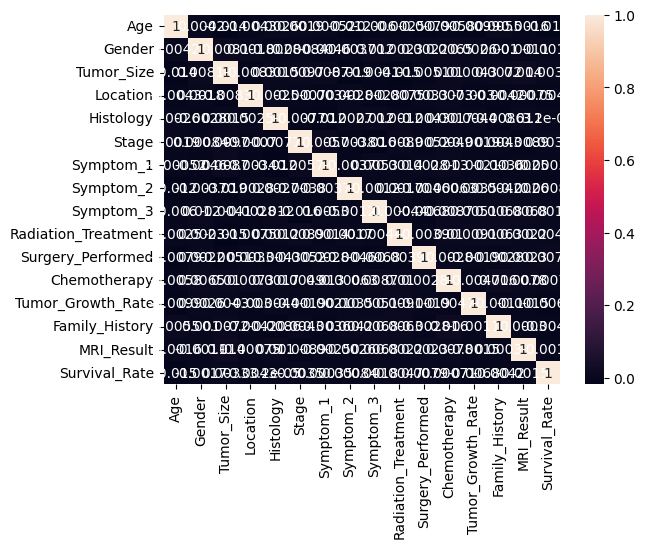

In [ ]:
sns.heatmap(ck_bt_data.corr(), annot=True) # annot=True 수치를 출력함. False입력시 숫자 없이 색깔로만 표현
plt.show()
## 히트맵을 보아 생존율을 예측하기 힘들어보임